# Exploratory Data Analysis

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 

In [2]:
data = pd.read_csv('./bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape

(41188, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no empty field values in the data

# Correlations between numerical variables

<AxesSubplot:>

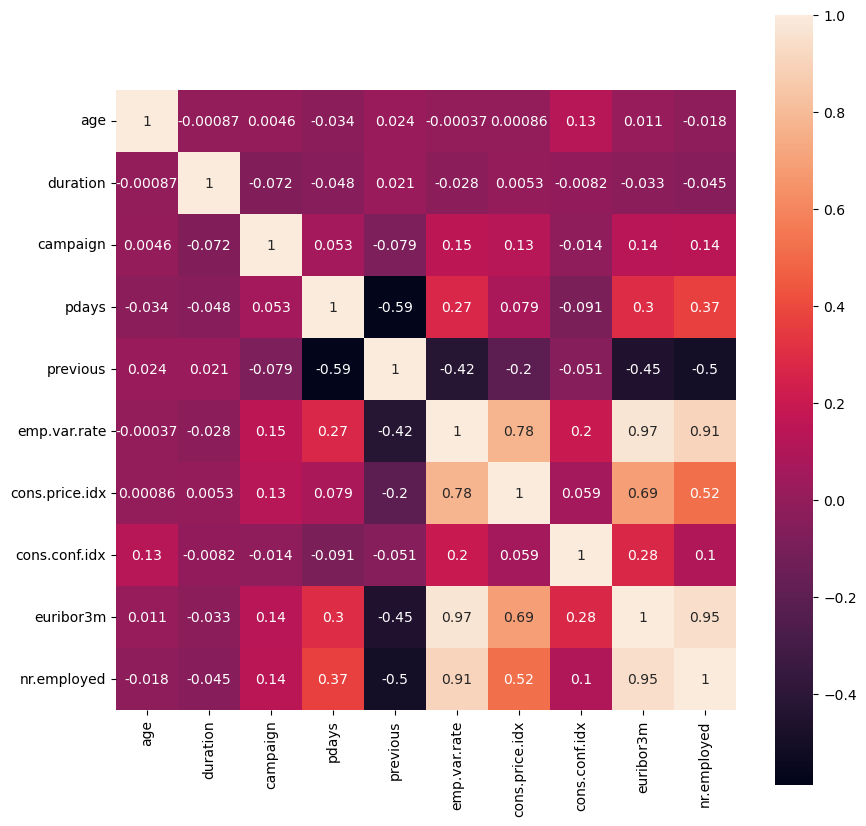

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), square=True, annot=True)


# Target value bar plot

Text(0, 0.5, 'Number of clients')

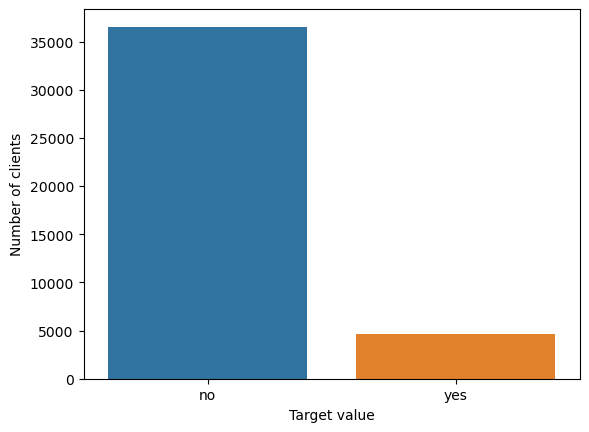

In [8]:
sns.countplot(data=data, x='y')
plt.xlabel("Target value")
plt.ylabel("Number of clients")

# Age of clients

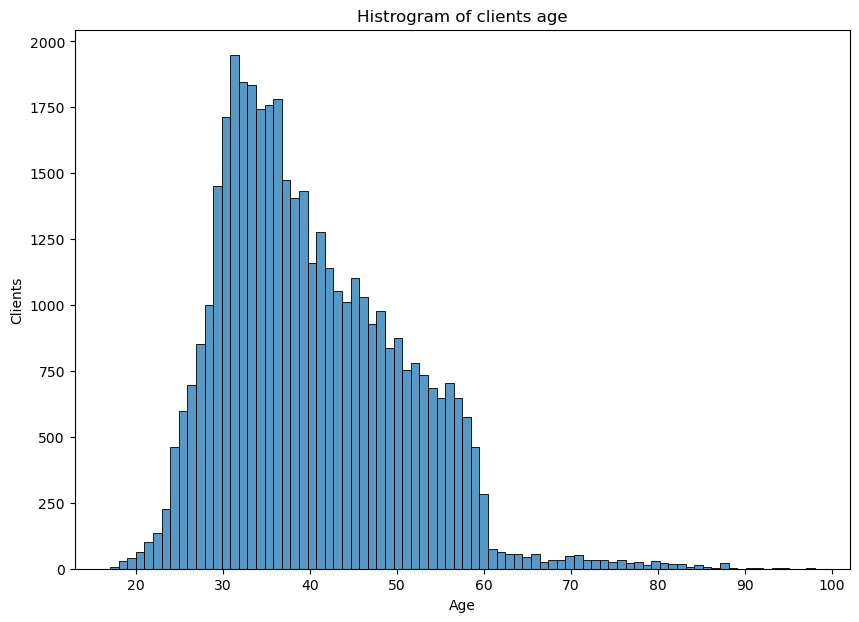

In [9]:
plt.figure(figsize=(10,7))
sns.histplot(data=data['age'], bins=(data['age'].max() - data['age'].min() + 1))
plt.xlabel('Age')
plt.ylabel('Clients')
plt.title('Histrogram of clients age')
plt.show()

# Violin plot for age of clients grouped by target value

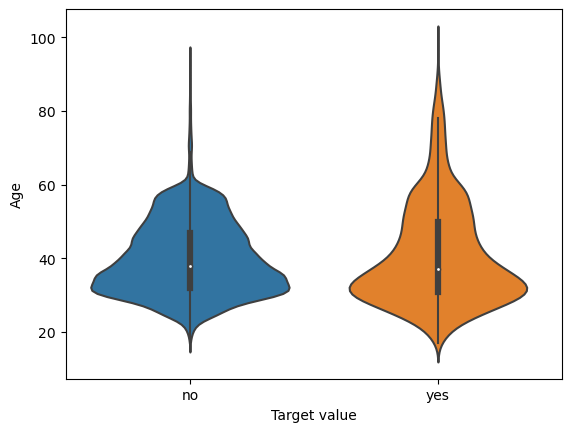

In [10]:
sns.violinplot(data=data, x='y', y='age')
plt.xlabel("Target value")
plt.ylabel("Age")
plt.show()

We can see that in the group that agreed to place the advertised deposit there is a bigger percentage of elderly people than in the other one, so we may assume that they were more likely to use the service.

# Bar plots for categorical variables

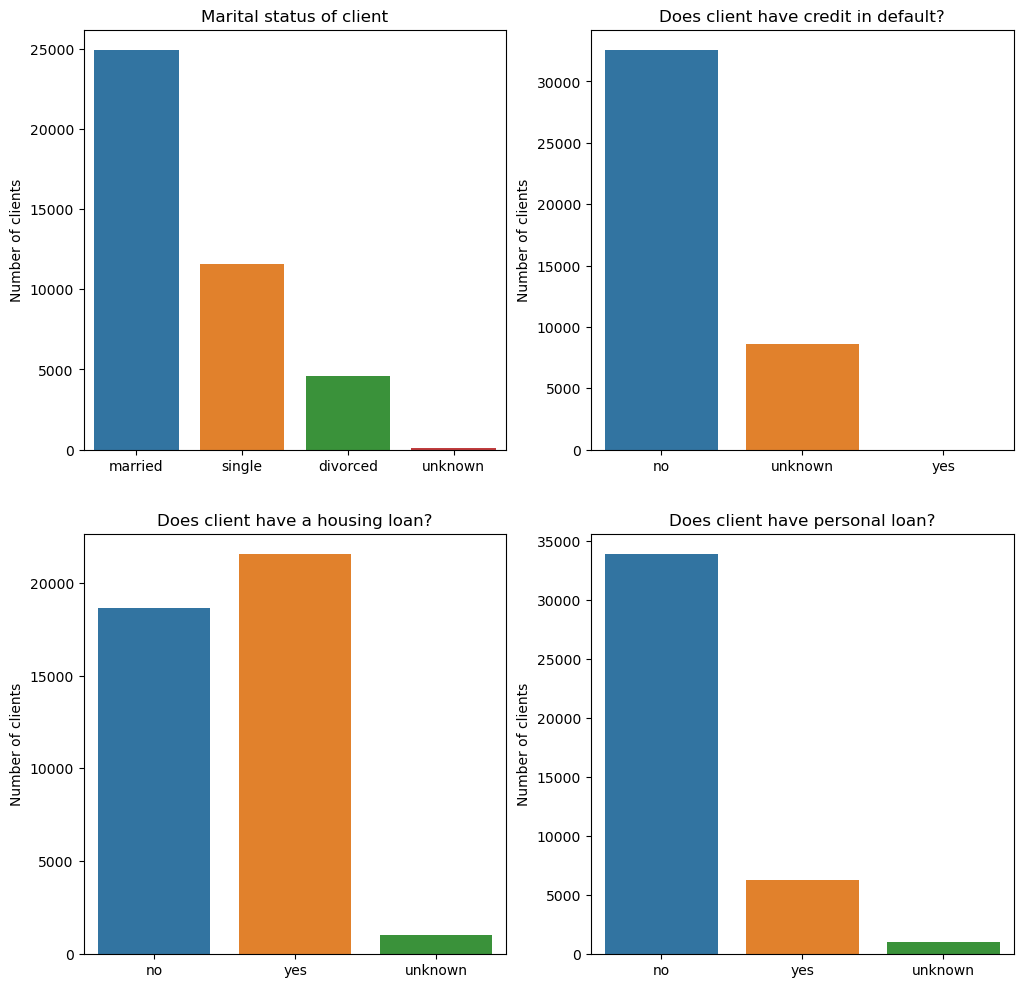

In [11]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(data=data, x='marital')
plt.title("Marital status of client")
plt.xlabel(' ')
plt.ylabel("Number of clients")

plt.subplot(2,2,2)
sns.countplot(data=data, x='default')
plt.title('Does client have credit in default?')
plt.xlabel(' ')
plt.ylabel("Number of clients")

plt.subplot(2,2,3)
sns.countplot(data=data, x='housing')
plt.title('Does client have a housing loan?')
plt.xlabel(' ')
plt.ylabel("Number of clients")

plt.subplot(2,2,4)
sns.countplot(data=data, x='loan')
plt.title('Does client have personal loan?')
plt.xlabel(' ')
plt.ylabel("Number of clients")

plt.show()

    

In [12]:
data.loc[data['default'] == 'yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


# Education of clients

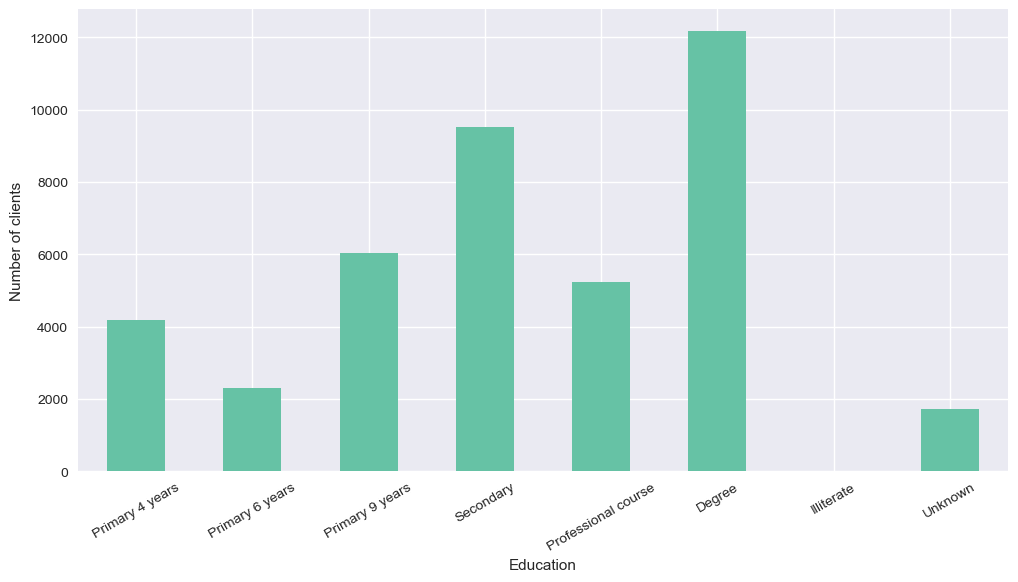

In [60]:
education_data = data['education'].value_counts()[['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'illiterate', 'unknown']]
education_data.rename({'basic.4y' : 'Primary 4 years', 
                        'basic.6y' : 'Primary 6 years',
                        'basic.9y' : 'Primary 9 years', 
                        'high.school' : 'Secondary',
                        'professional.course' : 'Professional course',
                        'university.degree' : 'Degree', 
                        'illiterate' : 'Illiterate', 
                        'unknown' : 'Unknown'}, inplace=True)

plt.figure(figsize=(12,6))
education_data.plot.bar(rot=30, colormap='Set2')
plt.style.use('seaborn')
plt.xlabel("Education")
plt.ylabel("Number of clients")
plt.show()